#### This notebook contains code to build a neural network to predict text sentiment

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('sentiment/cleaned_data.csv').iloc[1:,:2]
dataset = dataset[:600]
dataset.columns = ['Reviews', 'sentiment']

In [3]:
dataset.head()

,Reviews,sentiment
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
5,If you have several dozen or several hundred c...,0


In [4]:
dataset.tail()

,Reviews,sentiment
596,A pretty good product.,1
597,This is a great phone!.,1
598,For the price on Amazon,1
599,Their Research and Development division obviou...,1
600,The real killer is the volume,0


In [5]:
dataset.shape

(600, 2)

In [6]:
sentences = dataset['Reviews'].tolist()
labels = dataset['sentiment'].tolist()

In [7]:
# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [15]:
training_labels_final = np.asarray(training_labels_final).astype("float64")
testing_labels_final = np.asarray(testing_labels_final).astype("float64")

### Tokenize the dataset

In [8]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'

In [9]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Sentiment Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 50
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5616 - accuracy: 0.7917 - val_loss: 0.6144 - val_accuracy: 0.7167
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5507 - accuracy: 0.8083 - val_loss: 0.6083 - val_accuracy: 0.7167
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5415 - accuracy: 0.8562 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5297 - accuracy: 0.8167 - val_loss: 0.5957 - val_accuracy: 0.7167
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5163 - accuracy: 0.8521 - val_loss: 0.5897 - val_accuracy: 0.7250
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5049 - accuracy: 0.8750 - val_loss: 0.5830 - val_accuracy: 0.7333
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4947 - accuracy: 0.8729 - val_loss: 0.5772 - val_accuracy: 0.7417
Epoch 8/50
15/15 

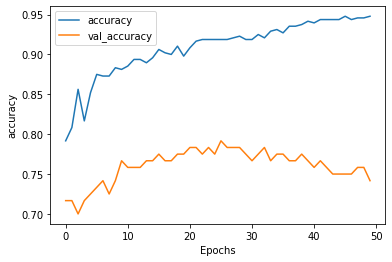

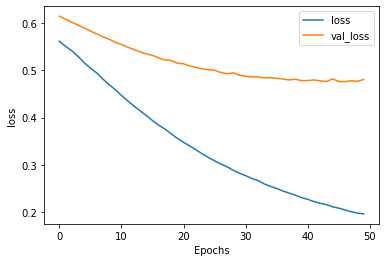

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 [==============================] - 0s 201ms/step
I love this phone
[0.9182773]


I hate spaghetti
[0.20549683]


Everything was cold
[0.6047723]


Everything was hot exactly as I wanted
[0.477339]


Everything was green
[0.6047723]


the host seated us immediately
[0.22586073]


they gave us free chocolate cake
[0.49867138]


not sure about the wilted flowers on the table
[0.03278346]


only works when I stand on tippy toes
[0.35585272]


does not work when I stand on my head
[0.04226987]


